**5 задание (до 18.11 включительно)**
- Реализовать простую алгоритмическую стратегию используя трендовые индикаторы или индикаторы осциляторы.
- Объяснить как и в каких ситуациях работает ваша стратегия, написать плюсы и минусы её.
- Улучшение бэктеста поощряется.

Для студентов КА и кто сам захочет, необходима ещё стратегия которая использует информацию о кластерах.

In [18]:
import numpy as np
import pandas as pd
import os
import math

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [51]:
import plotly.graph_objects as go
from datetime import datetime

In [54]:
import seaborn as sns

In [109]:
import matplotlib.gridspec as gridspec

# Load data

In [5]:
total_path = os.getcwd()

data_path = total_path + '//data//stock_data'

In [6]:
os.chdir(data_path)
ts_list = os.listdir()
os.chdir(total_path)

In [71]:
df = pd.read_excel(data_path + '//'+ts_list[2])

In [72]:
df

,Index,name,code,open,high,low,close,volume,turnover,turnover_rate,fqt
0,1991-07-03 00:00:00,PT金田A,3,3.37,3.44,3.33,3.37,1295,808925.00,0,1
1,1991-07-04 00:00:00,PT金田A,3,3.08,3.10,3.01,3.04,1535,953575.00,0,1
2,1991-07-05 00:00:00,PT金田A,3,3.33,3.37,3.29,3.33,2145,1295775.00,0,1
3,1991-07-08 00:00:00,PT金田A,3,3.28,3.28,3.13,3.28,1355,768800.00,0,1
4,1991-07-09 00:00:00,PT金田A,3,3.04,3.04,2.86,3.04,1555,779150.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2418,2002-03-29 00:00:00,PT金田A,3,2.23,2.23,2.23,2.23,4460,994640.21,0,1
2419,2002-04-05 00:00:00,PT金田A,3,2.34,2.34,2.34,2.34,4707,1101349.08,0,1
2420,2002-04-12 00:00:00,PT金田A,3,2.46,2.46,2.46,2.46,4969,1222465.02,0,1
2421,2002-04-19 00:00:00,PT金田A,3,2.58,2.58,2.58,2.58,14122,3643411.50,0,1


In [73]:
date_col = pd.to_datetime([x[:-6] for x in df['Index']])
df.index = date_col

In [74]:
df

,Index,name,code,open,high,low,close,volume,turnover,turnover_rate,fqt
1991-07-03,1991-07-03 00:00:00,PT金田A,3,3.37,3.44,3.33,3.37,1295,808925.00,0,1
1991-07-04,1991-07-04 00:00:00,PT金田A,3,3.08,3.10,3.01,3.04,1535,953575.00,0,1
1991-07-05,1991-07-05 00:00:00,PT金田A,3,3.33,3.37,3.29,3.33,2145,1295775.00,0,1
1991-07-08,1991-07-08 00:00:00,PT金田A,3,3.28,3.28,3.13,3.28,1355,768800.00,0,1
1991-07-09,1991-07-09 00:00:00,PT金田A,3,3.04,3.04,2.86,3.04,1555,779150.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2002-03-29,2002-03-29 00:00:00,PT金田A,3,2.23,2.23,2.23,2.23,4460,994640.21,0,1
2002-04-05,2002-04-05 00:00:00,PT金田A,3,2.34,2.34,2.34,2.34,4707,1101349.08,0,1
2002-04-12,2002-04-12 00:00:00,PT金田A,3,2.46,2.46,2.46,2.46,4969,1222465.02,0,1
2002-04-19,2002-04-19 00:00:00,PT金田A,3,2.58,2.58,2.58,2.58,14122,3643411.50,0,1


In [75]:
#check null values
df.isnull().sum().sort_values(ascending = False)

Index            0
name             0
code             0
open             0
high             0
low              0
close            0
volume           0
turnover         0
turnover_rate    0
fqt              0
dtype: int64

In [76]:
df.describe()

,code,open,high,low,close,volume,turnover,turnover_rate,fqt
count,2423.0,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2.423000e+03,2423.0,2423.0
mean,3.0,6.791622,6.934936,6.654073,6.795514,24047.224102,2.070331e+07,0.0,1.0
std,0.0,3.079162,3.143433,3.017067,3.086202,43492.474641,3.930947e+07,0.0,0.0
min,3.0,1.660000,1.660000,1.660000,1.660000,20.000000,9.000000e+03,0.0,1.0
25%,3.0,4.385000,4.490000,4.250000,4.385000,3181.000000,2.916138e+06,0.0,1.0
50%,3.0,6.480000,6.620000,6.350000,6.470000,7883.000000,8.406000e+06,0.0,1.0
75%,3.0,7.800000,7.980000,7.660000,7.800000,24503.500000,2.071655e+07,0.0,1.0
max,3.0,19.200000,19.730000,18.970000,19.170000,417806.000000,4.786480e+08,0.0,1.0


# Vizualization

In [77]:
fig = go.Figure(data=[go.Candlestick(x=df.index[:5000],
                open=df['open'][:5000],
                high=df['high'][:5000],
                low=df['low'][:5000],
                close=df['close'][:5000])])

fig.show()

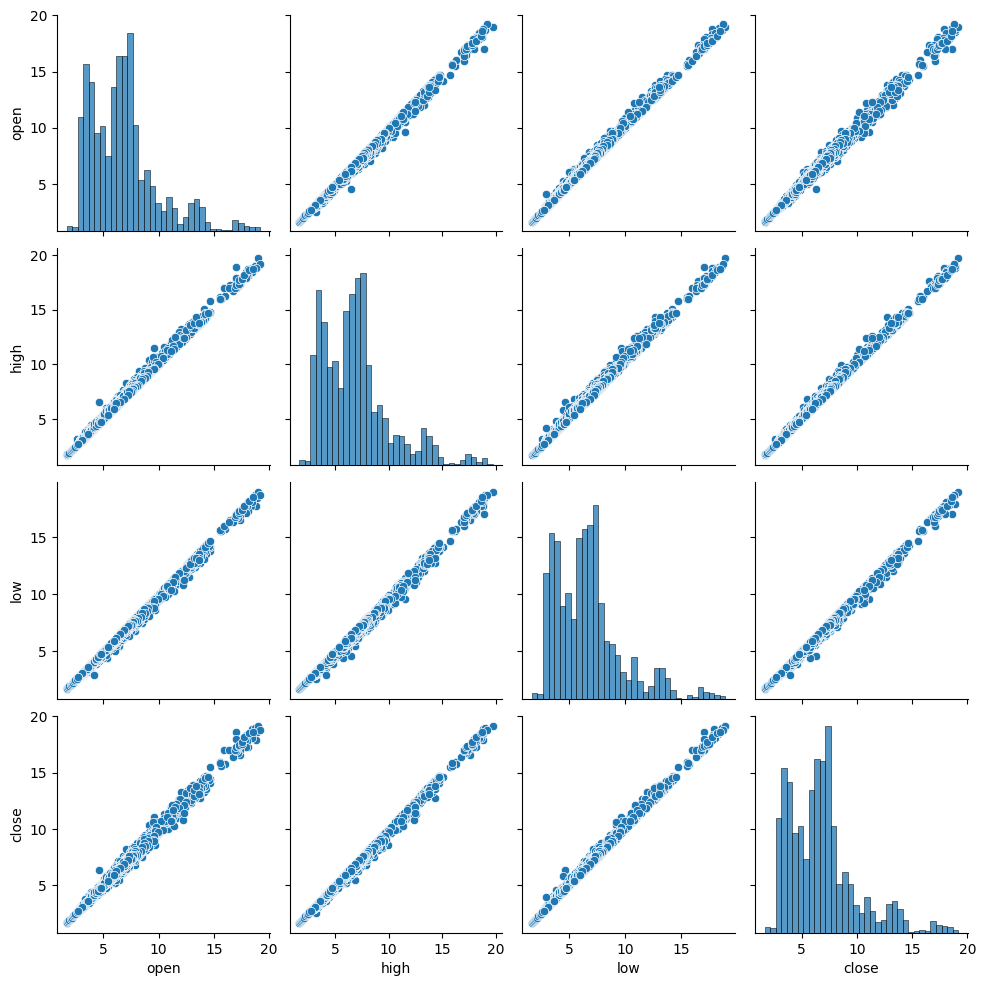

In [78]:
sns.pairplot(df[['open', 'high', 'low', 'close']])

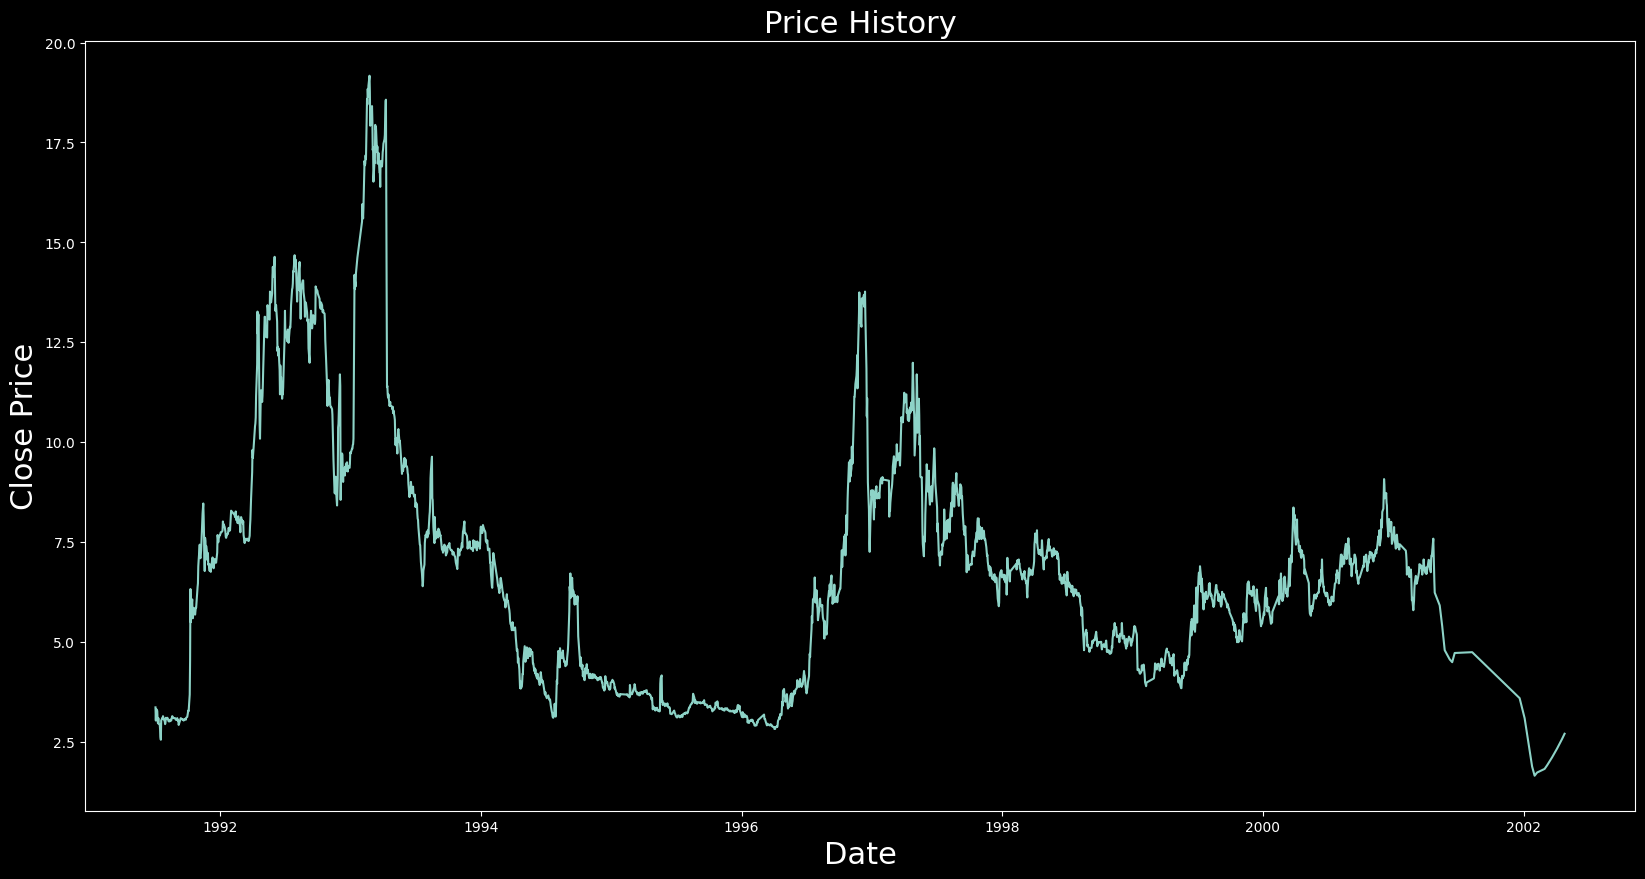

In [79]:

with plt.style.context('dark_background'):
    plt.figure(figsize = (20,10))
    plt.title('Price History', fontsize = 22)

    plt.xlabel('Date', fontsize = 22)
    plt.ylabel('Close Price', fontsize = 22)
    plt.plot(df['close'])
plt.show()

# Strategy

# First variant

В качестве стратегии было выбрано использовать цену закрытия за 60 дней, чтобы предсказать цену закрытия на следующий день.

In [80]:
#target column
df_target = df.filter(['close']).values
df_target.shape

(2423, 1)

In [81]:
df_train_len = int((df_target.shape[0]-60)* 0.8 + 60) #since we will use each 60 days of data
df_train_len

1950

In [82]:
scaler = MinMaxScaler(feature_range = (0,1))
df_target_scaled = scaler.fit_transform(df_target)

In [84]:
#split train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = df_target_scaled[0:df_train_len, :]
test_data = df_target_scaled[df_train_len - 60:, :]

#create new X and y training datasets
X_train = []
y_train = []
for i in range (60, len(train_data)):
    X_train.append(train_data[i-60:i, ]) #each X represent 60 days previous data
    y_train.append(train_data[i, 0])

#create new X and y testing datasets
X_test = []
y_test = df_target_scaled[df_train_len:, :] #actual data
for i in range (60, len(test_data)):
    X_test.append(test_data[i-60:i, ]) #each X represent 60 days previous data
    #y_train.append(test_data[i, 0])

In [85]:
X_train, y_train, X_test = np.array(X_train), np.array(y_train), np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1890, 60, 1)

In [86]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(473, 60, 1)

In [87]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [88]:
#compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [89]:
#train model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

1890/1890 [==============================] - 70s 34ms/step - loss: 0.0023


In [90]:
#predict model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 2s 24ms/step


In [91]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.12692226334303683

В качестве метрики качества было выбрано среднеквадратичное отклонение. RMSE равно 0,126, что является показателем того, что модель недостаточно точно предсказывает результат.

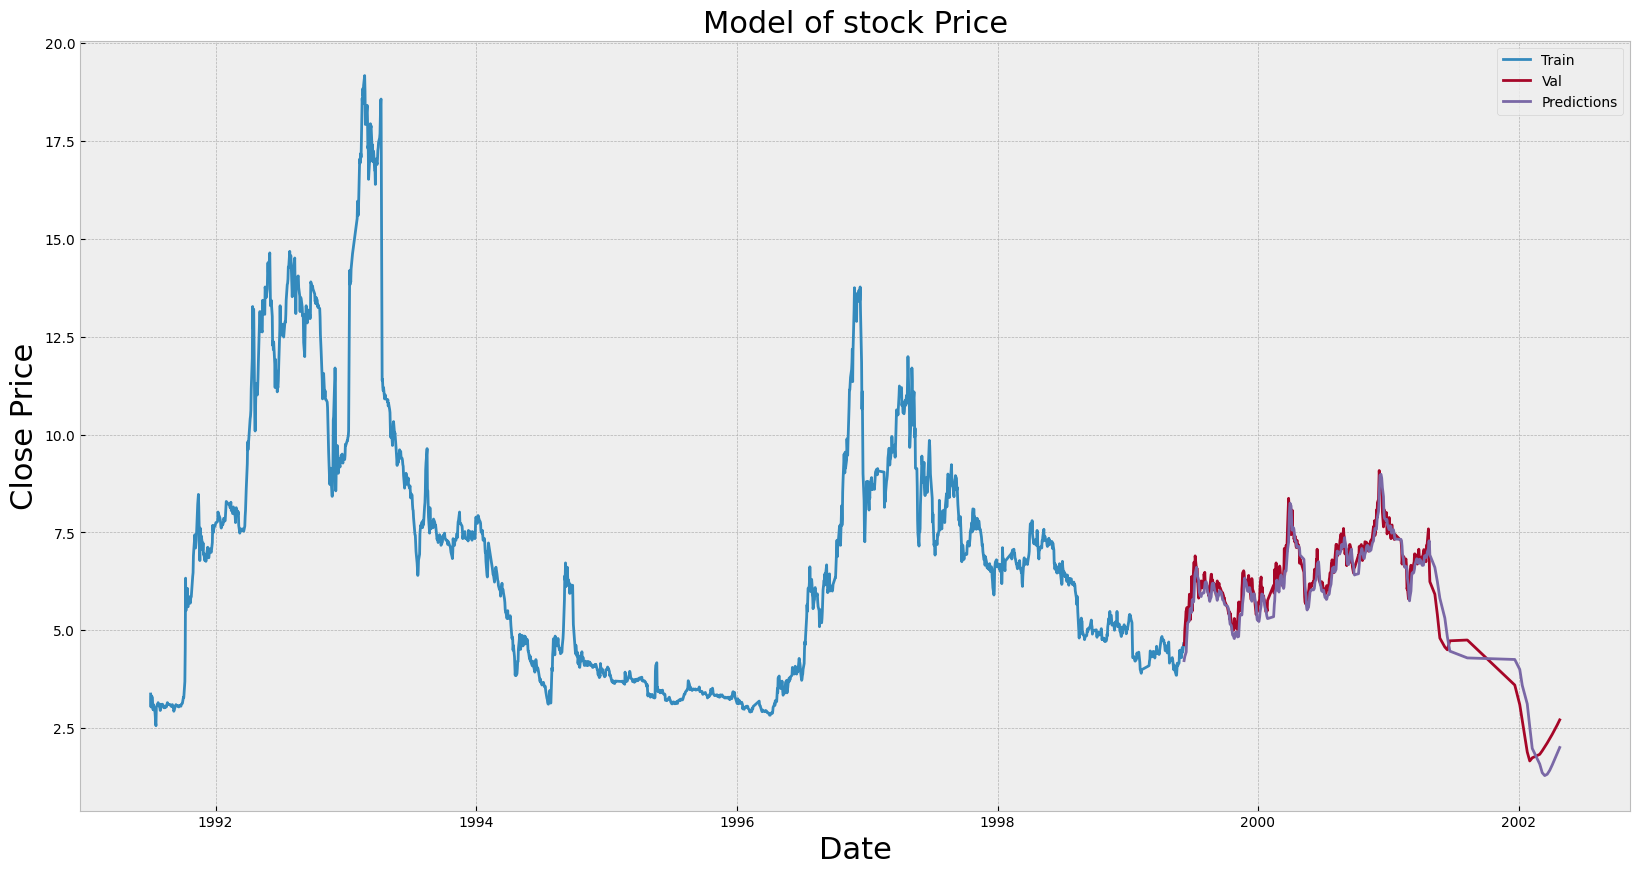

In [92]:
#Plot the data
train = df.filter(['close'])[:df_train_len]
valid = df.filter(['close'])[df_train_len:]
valid['Predictions'] = predictions

with plt.style.context('bmh'):
    plt.figure(figsize = (20,10))
    plt.title('Model of stock Price', fontsize = 22)

    plt.xlabel('Date', fontsize = 22)
    plt.ylabel('Close Price', fontsize = 22)
    plt.plot(train['close'])
    plt.plot(valid[['close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper right')
plt.show()

Для примера найдем close price для 26/06/2004

In [93]:
X_test_lastday = []
X_test_lastday.append(scaler.transform(df.filter(['close'])[-60:].values))
X_test_lastday = np.array(X_test_lastday)
X_test_lastday = np.reshape(X_test_lastday, (X_test_lastday.shape[0], X_test_lastday.shape[1], 1))
pred_price = model.predict(X_test_lastday)# using previous model

1/1 [==============================] - 0s 31ms/step


In [94]:
print('Our predict 26/06/2004 stock price is: {}$'.format(scaler.inverse_transform(pred_price)[0][0]))

Our predict 26/06/2004 stock price is: 2.1456425189971924$


--------

# Second variant

Поскольку выше мы строили прогноз для 60 дней, можно попробовать применить kNN и сравнить результат

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [96]:
#by original dataset
df_scaled = pd.DataFrame(df_target_scaled, columns = ['Close Price'])
df_scaled['Prediction'] = df_scaled[['Close Price']].shift(-60)
df_scaled

,Close Price,Prediction
0,0.097658,0.081097
1,0.078812,0.079954
2,0.095374,0.082810
3,0.092519,0.083952
4,0.078812,0.093090
...,...,...
2418,0.032553,NaN
2419,0.038835,NaN
2420,0.045688,NaN
2421,0.052541,NaN


In [97]:
X = np.array(df_scaled.drop(['Prediction'],1))[: -60]
y = np.array(df_scaled.drop(['Close Price'],1))[: -60]
X_last_60days = np.array(df_scaled.drop(['Prediction'],1))[-60:]

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11440\2156024386.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11440\2156024386.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11440\2156024386.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [98]:
X_train, y_train, X_test, y_test = X[:df_train_len], y[:df_train_len], X[df_train_len:], y[df_train_len:]

In [99]:
model = KNeighborsRegressor(n_neighbors = 60)
#if we need to find the best parameter, we can use GridSearchCV

In [100]:
parameters = {'n_neighbors': list(range(11)) + [20,40,60],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)
predictions = scaler.inverse_transform(predictions)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


40 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_regression.py", line 213, in fit
    return self._fit(X, y)
  File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python3

In [101]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.4867784503631961

Показатель RMSE лучше, чем в первом случае

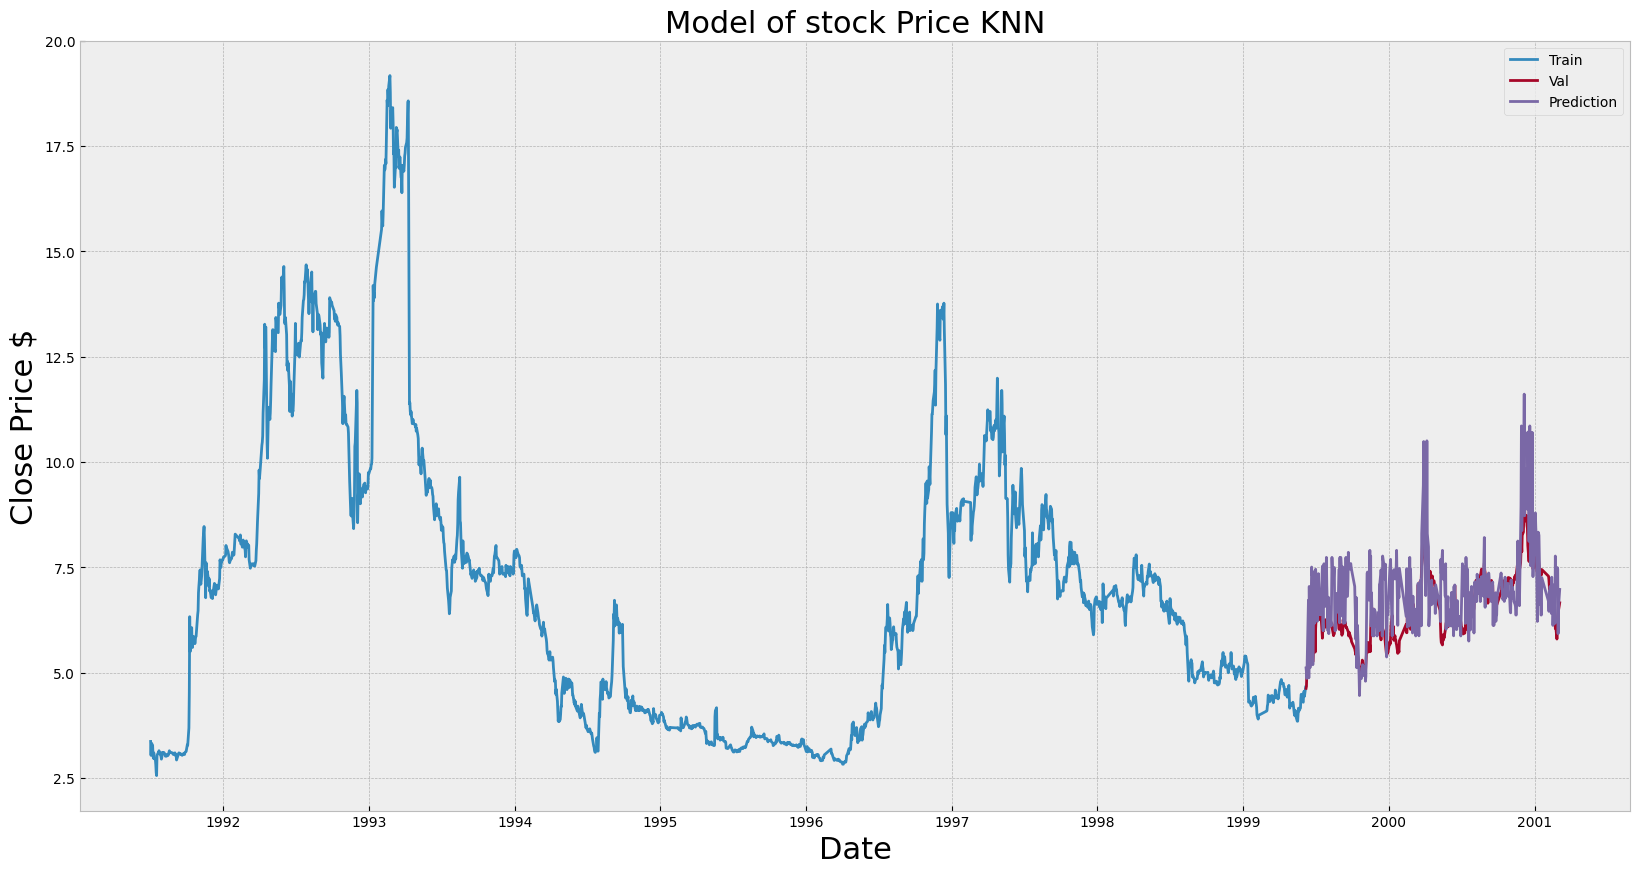

In [102]:
train = df.filter(['close'])[:df_train_len]
valid = df.filter(['close'])[df_train_len:-60]
valid['Predictions'] = predictions
with plt.style.context('bmh'):
    plt.figure(figsize = (20,10))
    plt.title('Model of stock Price KNN', fontsize = 22)

    plt.xlabel('Date', fontsize = 22)
    plt.ylabel('Close Price $', fontsize = 22)
    plt.plot(train['close'])
    plt.plot(valid[['close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Prediction'], loc = 'upper right')
plt.show()

-------

# Third variant

Построим базовую стратегию, которую назовем TSMStrategy. Для этого потребуется логарифмическая доходность нашего временного ряда, интересующий нас период и логическая переменная, которая определяет, разрешим ли мы короткие позиции или нет. Затем функция смоделирует стратегию и вернет совокупную сумму результатов для дальнейшего анализа.

In [106]:
def TSMStrategy(returns, period=1, shorts=False):
    if shorts:
        position = returns.rolling(period).mean().map(
            lambda x: -1 if x <= 0 else 1)
    else:
        position = returns.rolling(period).mean().map(
            lambda x: 0 if x <= 0 else 1)
    performance = position.shift(1) * returns
    return performance

In [107]:
# we need to calculate the log returns
returns = np.log(df['close'] / df['close'].shift(1)).dropna()

Если акция вчера выросла в цене, мы ее покупаем, и продаем, если цена упала (или удерживаем)

In [108]:
performance = TSMStrategy(returns, period=1, shorts=False).dropna()
years = (performance.index.max() - performance.index.min()).days / 365
perf_cum = np.exp(performance.cumsum())
tot = perf_cum[-1] - 1
ann = perf_cum[-1] ** (1 / years) - 1
vol = performance.std() * np.sqrt(252)
rfr = 0.02
sharpe = (ann - rfr) / vol
print(f"1-day TSM Strategy yields:" +
      f"\n\t{tot*100:.2f}% total returns" + 
      f"\n\t{ann*100:.2f}% annual returns" +
      f"\n\t{sharpe:.2f} Sharpe Ratio")
gme_ret = np.exp(returns.cumsum())
b_tot = gme_ret[-1] - 1
b_ann = gme_ret[-1] ** (1 / years) - 1
b_vol = returns.std() * np.sqrt(252)
b_sharpe = (b_ann - rfr) / b_vol
print(f"Baseline Buy-and-Hold Strategy yields:" + 
      f"\n\t{b_tot*100:.2f}% total returns" + 
      f"\n\t{b_ann*100:.2f}% annual returns" +
      f"\n\t{b_sharpe:.2f} Sharpe Ratio")

1-day TSM Strategy yields:
	272.28% total returns
	12.92% annual returns
	0.25 Sharpe Ratio
Baseline Buy-and-Hold Strategy yields:
	-19.58% total returns
	-1.99% annual returns
	-0.07 Sharpe Ratio


In [121]:
ticker = 'PT金田A'

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11440\4137106943.py:46: UserWarning:

Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11440\4137106943.py:46: UserWarning:

Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.



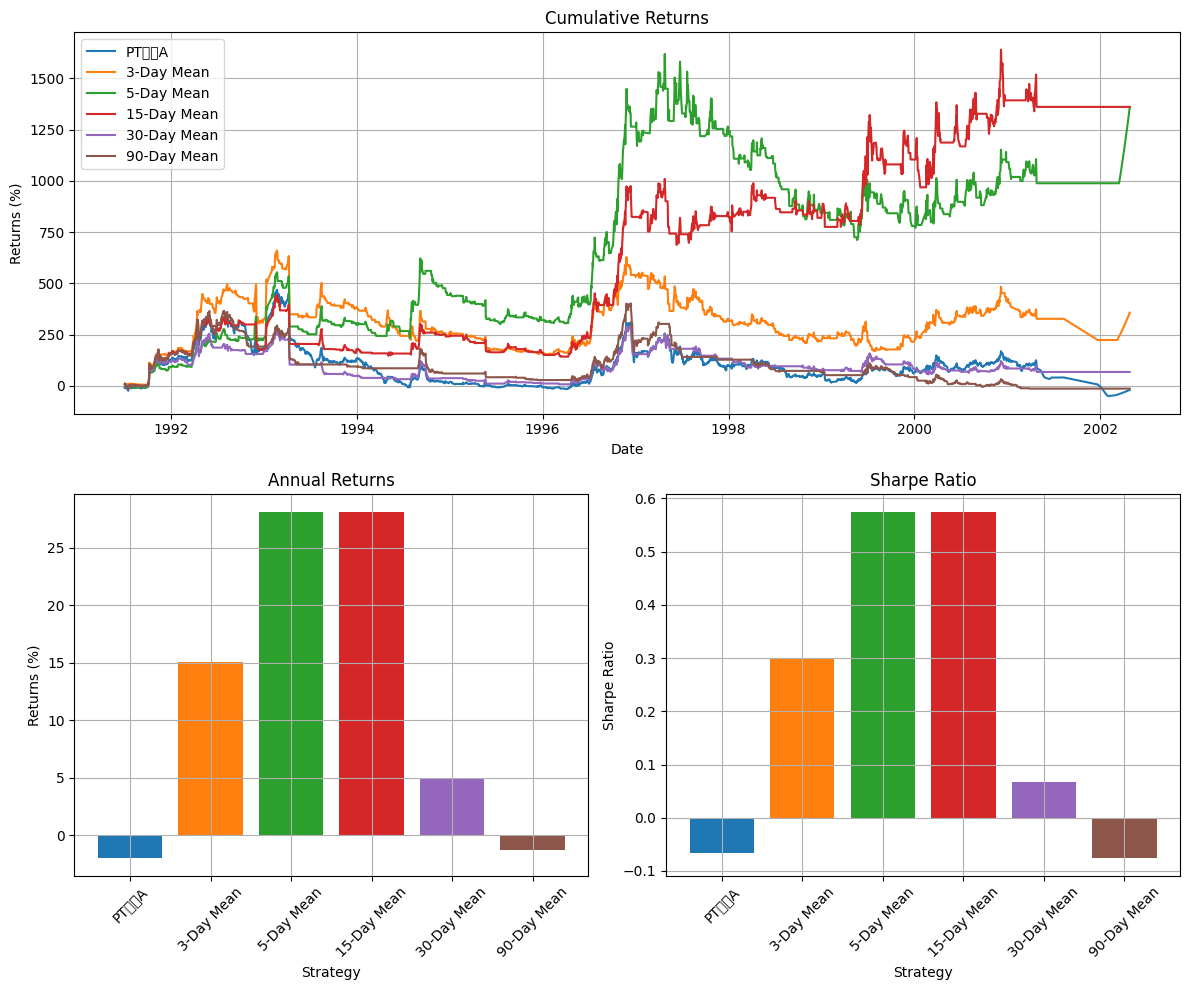

In [122]:
periods = [3, 5, 15, 30, 90]
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(4, 4)
ax0 = fig.add_subplot(gs[:2, :4])
ax1 = fig.add_subplot(gs[2:, :2])
ax2 = fig.add_subplot(gs[2:, 2:])
ax0.plot((np.exp(returns.cumsum()) - 1) * 100, label = ticker, linestyle='-')
perf_dict = {'tot_ret': {'buy_and_hold': (np.exp(returns.sum()) - 1)}}
perf_dict['ann_ret'] = {'buy_and_hold': b_ann}
perf_dict['sharpe'] = {'buy_and_hold': b_sharpe}
for p in periods:
    log_perf = TSMStrategy(returns, period=p, shorts=False)
    perf = np.exp(log_perf.cumsum())
    perf_dict['tot_ret'][p] = (perf[-1] - 1)
    ann = (perf[-1] ** (1/years) - 1)
    perf_dict['ann_ret'][p] = ann
    vol = log_perf.std() * np.sqrt(252)
    perf_dict['sharpe'][p] = (ann - rfr) / vol
    ax0.plot((perf - 1) * 100, label=f'{p}-Day Mean')
    
ax0.set_ylabel('Returns (%)')
ax0.set_xlabel('Date')
ax0.set_title('Cumulative Returns')
ax0.grid()
ax0.legend()
_ = [ax1.bar(i, v * 100) for i, v in enumerate(perf_dict['ann_ret'].values())]
ax1.set_xticks([i for i, k in enumerate(perf_dict['ann_ret'])])
ax1.set_xticklabels([f'{k}-Day Mean' 
    if type(k) is int else ticker for 
    k in perf_dict['ann_ret'].keys()],
    rotation=45)
ax1.grid()
ax1.set_ylabel('Returns (%)')
ax1.set_xlabel('Strategy')
ax1.set_title('Annual Returns')
_ = [ax2.bar(i, v) for i, v in enumerate(perf_dict['sharpe'].values())]
ax2.set_xticks([i for i, k in enumerate(perf_dict['sharpe'])])
ax2.set_xticklabels([f'{k}-Day Mean' 
    if type(k) is int else ticker for 
    k in perf_dict['sharpe'].keys()],
    rotation=45)
ax2.grid()
ax2.set_ylabel('Sharpe Ratio')
ax2.set_xlabel('Strategy')
ax2.set_title('Sharpe Ratio')
plt.tight_layout()
plt.show()

Ближе всего к ральным резульатам 90-дневной прогноз.

В результатах наблюдается большой разброс. Это указывает на то, что у нас нет очень надежной стратегии (что неудивительно). Мы могли бы развить эту базовую стратегию, включив другие индикаторы, такие как скользящее среднее или экспоненциально взвешенное скользящее среднее. Мы могли бы лучше управлять нашим риском, включив стоп-лоссы или трейлинг-стопы, чтобы выходить из сделок ближе к вершине, а не когда у нас 90-дневный спад или флэт. Мы также могли бы распределить капитал по нескольким ценным бумагам, тем самым извлекая выгоду из диверсификации и отслеживая тенденции, где бы они ни появлялись.